In [26]:
import pandas as pd
import numpy as np
from utils.utils import load_dataset

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [13]:
dataset_name = 'Fdataset'

In [14]:
(drug_name, disease_name, 
            Wrd, 
            Wrr_eight, 
            Wrr_seven_llms_kgs, Wrr_seven_llms_geps, Wrr_seven_kgs_geps, 
            Wrr_six_geps, Wrr_six_kgs, Wrr_six_llms, 
            Wrr_five, 
            Wdd_three, 
            Wdd_two, 
            Trr_eight, 
            Trr_seven_llms_kgs, Trr_seven_llms_geps, Trr_seven_kgs_geps, 
            Trr_six_geps, Trr_six_kgs, Trr_six_llms, Trr_five, 
            Tdd_three, 
            Tdd_two, 
            drug_embeddings, disease_embeddings) = load_dataset(dataset_name, embedding_type='llm')

In [36]:
drug_embeddings.shape, disease_embeddings.shape, drug_name.shape, disease_name.shape, Wrd.shape

((593, 1024), (313, 1024), (593,), (313,), (593, 313))

In [27]:
drug = list(set(['DB00906', 'DB00515', 'DB00794', 'DB00232', 'DB00997', 'DB00169', 'DB01088', 'DB00398', 'DB00958']))
disease = list(set(['D239350', 'D239350', 'D137800', 'D121200', 'D256370', 'D267730', 'D182280', 'D146255', 'D601367', 'D276300', 'D137215']))

In [28]:
drug_indices = [np.where(drug_name == d)[0][0] for d in drug if d in drug_name]
disease_indices = [np.where(disease_name == d)[0][0] for d in disease if d in disease_name]

In [29]:
selected_drug_embeddings = drug_embeddings[drug_indices]
selected_disease_embeddings = disease_embeddings[disease_indices]

In [33]:
all_embeddings = np.vstack((selected_drug_embeddings, selected_disease_embeddings))
all_names = drug + disease
all_labels = ['Drug'] * len(selected_drug_embeddings) + ['Disease'] * len(selected_disease_embeddings)

In [34]:
pca = PCA(n_components=2)
all_embeddings_2d = pca.fit_transform(all_embeddings)

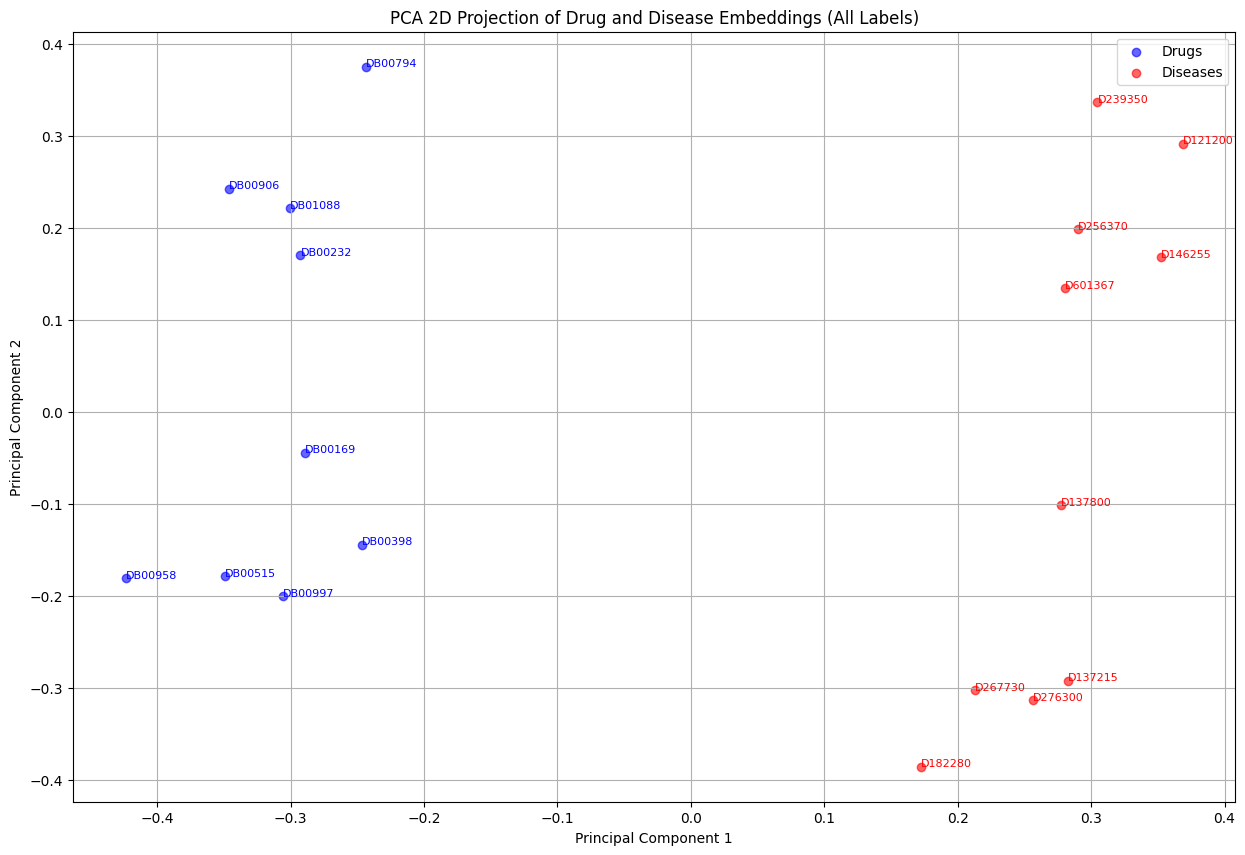

In [35]:
plt.figure(figsize=(15, 10))

plt.scatter(all_embeddings_2d[:len(selected_drug_embeddings), 0],
            all_embeddings_2d[:len(selected_drug_embeddings), 1],
            c='blue', label='Drugs', alpha=0.6)

plt.scatter(all_embeddings_2d[len(selected_drug_embeddings):, 0],
            all_embeddings_2d[len(selected_drug_embeddings):, 1],
            c='red', label='Diseases', alpha=0.6)

for i, name in enumerate(all_names):
    plt.text(all_embeddings_2d[i, 0], all_embeddings_2d[i, 1], name, fontsize=8,
             color='blue' if i < len(selected_drug_embeddings) else 'red')

plt.title("PCA 2D Projection of Drug and Disease Embeddings (All Labels)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

['D109800' 'D114480' 'D137215' 'D188470' 'D194070' 'D211980' 'D236000'
 'D247640' 'D254500' 'D256700' 'D259500' 'D268220' 'D276300' 'D601626']


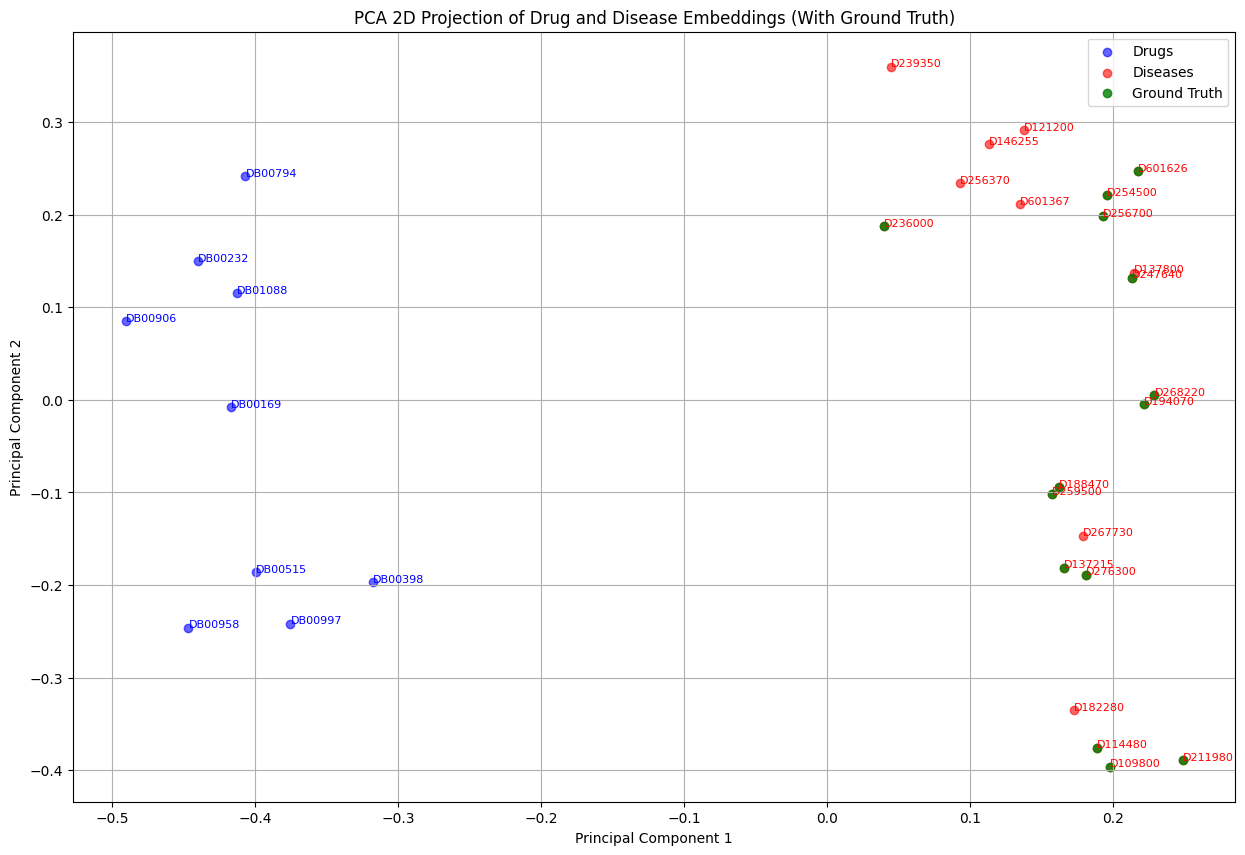

In [41]:
import pandas as pd
import numpy as np
from utils.utils import load_dataset

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 加载数据集
dataset_name = 'Fdataset'
(drug_name, disease_name, 
            Wrd, 
            Wrr_eight, 
            Wrr_seven_llms_kgs, Wrr_seven_llms_geps, Wrr_seven_kgs_geps, 
            Wrr_six_geps, Wrr_six_kgs, Wrr_six_llms, 
            Wrr_five, 
            Wdd_three, 
            Wdd_two, 
            Trr_eight, 
            Trr_seven_llms_kgs, Trr_seven_llms_geps, Trr_seven_kgs_geps, 
            Trr_six_geps, Trr_six_kgs, Trr_six_llms, Trr_five, 
            Tdd_three, 
            Tdd_two, 
            drug_embeddings, disease_embeddings) = load_dataset(dataset_name, embedding_type='llm')

# 原始药物和疾病列表
drug = list(set(['DB00906', 'DB00515', 'DB00794', 'DB00232', 'DB00997', 'DB00169', 'DB01088', 'DB00398', 'DB00958']))
disease = list(set(['D239350', 'D239350', 'D137800', 'D121200', 'D256370', 'D267730', 'D182280', 'D146255', 'D601367', 'D276300', 'D137215']))

# 确定 DB00906 在 drug_name 中的索引
drug_idx = np.where(drug_name == 'DB00997')[0][0]

# 找到与 DB00906 相关联的疾病索引（ground truth）
related_disease_indices = np.where(Wrd[drug_idx, :] > 0)[0]

# 将 ground truth 的疾病名称加入 disease 列表
ground_truth_diseases = disease_name[related_disease_indices]
print(ground_truth_diseases)
disease.extend(ground_truth_diseases)

# 去重，防止重复
disease = list(set(disease))

# 获取药物和疾病对应的索引
drug_indices = [np.where(drug_name == d)[0][0] for d in drug if d in drug_name]
disease_indices = [np.where(disease_name == d)[0][0] for d in disease if d in disease_name]

# 提取对应的 embeddings
selected_drug_embeddings = drug_embeddings[drug_indices]
selected_disease_embeddings = disease_embeddings[disease_indices]

# 合并药物和疾病的 embeddings
all_embeddings = np.vstack((selected_drug_embeddings, selected_disease_embeddings))
all_names = drug + disease
all_labels = ['Drug'] * len(selected_drug_embeddings) + ['Disease'] * len(selected_disease_embeddings)

# 确定 ground truth 疾病在选中的疾病列表中的索引
ground_truth_indices = [disease.index(d) for d in ground_truth_diseases if d in disease]

# PCA 降维到 2D
pca = PCA(n_components=2)
all_embeddings_2d = pca.fit_transform(all_embeddings)

# 绘图
plt.figure(figsize=(15, 10))

# 绘制药物点
plt.scatter(all_embeddings_2d[:len(selected_drug_embeddings), 0],
            all_embeddings_2d[:len(selected_drug_embeddings), 1],
            c='blue', label='Drugs', alpha=0.6)

# 绘制疾病点
plt.scatter(all_embeddings_2d[len(selected_drug_embeddings):, 0],
            all_embeddings_2d[len(selected_drug_embeddings):, 1],
            c='red', label='Diseases', alpha=0.6)

# 绘制 ground truth 疾病点
for i in ground_truth_indices:
    plt.scatter(all_embeddings_2d[len(selected_drug_embeddings) + i, 0],
                all_embeddings_2d[len(selected_drug_embeddings) + i, 1],
                c='green', label='Ground Truth' if 'Ground Truth' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.8)

# 添加标注
for i, name in enumerate(all_names):
    plt.text(all_embeddings_2d[i, 0], all_embeddings_2d[i, 1], name, fontsize=8,
             color='blue' if i < len(selected_drug_embeddings) else 'red')

plt.title("PCA 2D Projection of Drug and Disease Embeddings (With Ground Truth)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

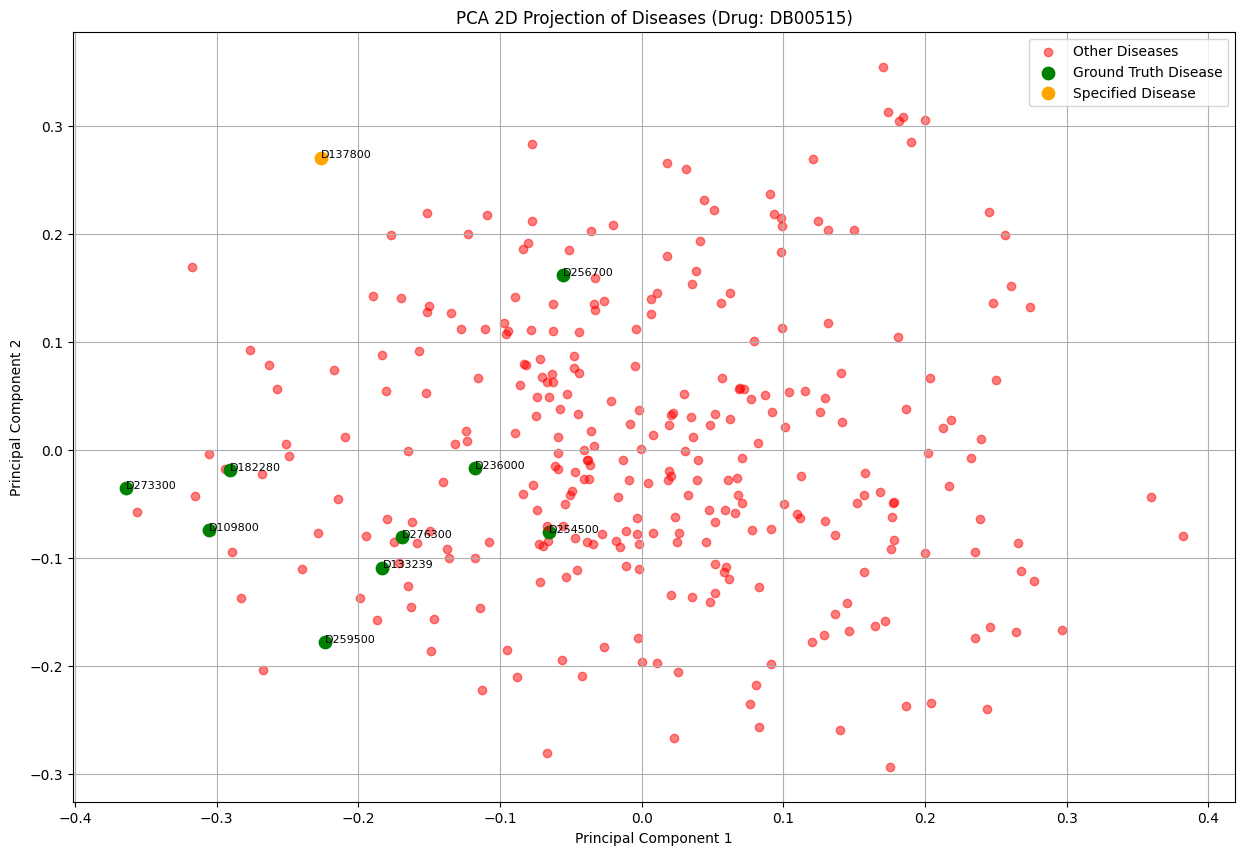

In [46]:
import pandas as pd
import numpy as np
from utils.utils import load_dataset

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 加载数据集
dataset_name = 'Fdataset'
(drug_name, disease_name, 
            Wrd, 
            Wrr_eight, 
            Wrr_seven_llms_kgs, Wrr_seven_llms_geps, Wrr_seven_kgs_geps, 
            Wrr_six_geps, Wrr_six_kgs, Wrr_six_llms, 
            Wrr_five, 
            Wdd_three, 
            Wdd_two, 
            Trr_eight, 
            Trr_seven_llms_kgs, Trr_seven_llms_geps, Trr_seven_kgs_geps, 
            Trr_six_geps, Trr_six_kgs, Trr_six_llms, Trr_five, 
            Tdd_three, 
            Tdd_two, 
            drug_embeddings, disease_embeddings) = load_dataset(dataset_name, embedding_type='llm')

# 指定药物和疾病
specified_drug = 'DB00515'
specified_disease = 'D137800'

# 确定药物和疾病在对应数组中的索引
drug_idx = np.where(drug_name == specified_drug)[0][0]
disease_idx = np.where(disease_name == specified_disease)[0][0]

# 找到药物的全部 ground truth
ground_truth_indices = np.where(Wrd[drug_idx, :] > 0)[0]
ground_truth_diseases = disease_name[ground_truth_indices]

# 提取所有疾病的嵌入
all_disease_embeddings = disease_embeddings
all_disease_names = disease_name

# 提取指定药物的嵌入
specified_drug_embedding = drug_embeddings[drug_idx]

# PCA 降维
pca = PCA(n_components=2)
all_disease_embeddings_2d = pca.fit_transform(all_disease_embeddings)

# 绘图
plt.figure(figsize=(15, 10))

# 绘制其他疾病点
for i in range(len(all_disease_embeddings_2d)):
    if i == disease_idx:  # 指定的疾病
        plt.scatter(all_disease_embeddings_2d[i, 0], all_disease_embeddings_2d[i, 1],
                    c='orange', label='Specified Disease' if 'Specified Disease' not in plt.gca().get_legend_handles_labels()[1] else "", s=80)
    elif i in ground_truth_indices:  # Ground truth 疾病
        plt.scatter(all_disease_embeddings_2d[i, 0], all_disease_embeddings_2d[i, 1],
                    c='green', label='Ground Truth Disease' if 'Ground Truth Disease' not in plt.gca().get_legend_handles_labels()[1] else "", s=80)
    else:  # 其他疾病
        plt.scatter(all_disease_embeddings_2d[i, 0], all_disease_embeddings_2d[i, 1],
                    c='red', label='Other Diseases' if 'Other Diseases' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.5)

# 添加标注（仅指定疾病和 ground truth）
for i, name in enumerate(all_disease_names):
    if i == disease_idx or i in ground_truth_indices:
        plt.text(all_disease_embeddings_2d[i, 0], all_disease_embeddings_2d[i, 1], name, fontsize=8)

plt.title(f"PCA 2D Projection of Diseases (Drug: {specified_drug})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()